<h1 align='center'>Classifier Results - Preliminary Observation</h1>

<p>Here we try to run some trained classifiers for observing their results in different scenarios.</p>

In [2]:
import os
import pickle
#models_dir = '/media/fernando/DADOS/UNICAMP/PHD/models/2017-12-15'
models_dir = '../models-svd-24'
dataset_dir = '../datasets'

<p>Loading models and datasets. We have a dataset with emolex info and features reduced using SVD and a dataframe containing texts and classes tagged.</p>

In [3]:
# load auto tagged test set
#test_set = pickle.load(open(os.path.join(dataset_dir, 'tweets_auto-tagged-emolex_svd_test.pkl'), "rb" ), encoding='latin1') 
import sys
import pandas as pd

sys.path.append(os.path.join(os.getcwd(), '..'))

from nlp_utils.nlp_bag_of_words import *
from sklearn.decomposition import TruncatedSVD
from nlp_utils.nlp_semantic import *

dataframe_test = pd.read_csv(os.path.join(dataset_dir,'tweets_auto-tagged-emolex_test.csv'), engine='c')
#tfidf_vectorizer = pickle.load(open(os.path.join(models_dir, 'tfidf_vectorizer.pkl'), 'rb'))

with open(os.path.join(models_dir, 'tfidf_vectorizer.pkl'), 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    tfidf_vectorizer = u.load()


tfs = tfidf_vectorizer.transform(dataframe_test['text'])

#svd_transformer = pickle.load(open(os.path.join(models_dir, 'svd_transformer.pkl'), 'rb'))
with open(os.path.join(models_dir, 'svd_transformer.pkl'), 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    svd_transformer = u.load()

test_set = svd_transformer.transform(tfs)
test_set = test_set

/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfTransformer from version pre-0.18 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfVectorizer from version pre-0.18 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TruncatedSVD from version pre-0.18 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [3]:
dataframe_test.head()

Unnamed: 0  Unnamed: 0.1             tweet_id  \
0           1             2  695369012037857284l   
1          13            14  651347503103606788l   
2          17            18  681871957013299205l   
3          19            20  668922888905433088l   
4          20            21  694654076190113793l   

                                                text  TRU  DIS  JOY  SAD  ANT  \
0  #janta de hoje #comidajaponesa #delicia @ osas...    0    0    0    0    0   
1  e já tem gente roubando minha cantada 󾍂󾍂\ne ne...    0    0    0    1    0   
2  o que eu espero de 2016? #recomeço  uma nova c...    0    0    1    0    0   
3  a minha progenitora só liga aos likes\n#triste...    0    0    0    1    0   
4  não to achando o tt q eu via gif de gatinho to...    0    0    0    1    0   

   SUR       ...         emolex_joy  emolex_sad  emolex_trust  emolex_disgust  \
0    0       ...                  0           0             0               0   
1    0       ...                  0           0             0               0   
2    0       ...                  0           0             0               0   
3    0       ...                  0           0             0               0   
4    0       ...                  0           0             0               0   

   emolex_anger  emolex_fear  emolex_anticipation  emolex_surprise  \
0             0            0                    0                0   
1             0            0                    0                0   
2             0            0                    0                1   
3             0            0                    0                0   
4             0            0                    0                0   

   emolex_positive  emolex_negative  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0  

[5 rows x 24 columns]

In [4]:
print(test_set.shape)

(55631, 10)


In [5]:
#import pandas as pd
#dataframe_test = pd.read_csv(os.path.join(dataset_dir, 'tweets_auto-tagged-emolex_test.csv'), engine='c')


<p>Adding emolex features to the test set and normalizing.</p>

In [4]:
import numpy as np

print(dataframe_test.shape)

for dim in ["emolex_joy","emolex_sad","emolex_trust",\
                "emolex_disgust","emolex_anger","emolex_fear",\
                "emolex_anticipation","emolex_surprise",\
                "emolex_positive","emolex_negative"]:        
        test_set = np.c_[test_set, dataframe_test[dim]]

print(test_set)

(55631, 24)
[[ 9.36844763e-02  4.68109727e-02 -1.81641962e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.91584117e-02 -2.31175406e-02 -1.02353163e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.47726028e-02 -3.99840038e-02 -9.96154734e-03 ...  1.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 8.95096167e-02  3.77861087e-02 -4.83355970e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.78153102e-02  3.69015227e-02 -2.53229281e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.71216757e-02 -2.02304035e-02  3.38856075e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [5]:
print(test_set.shape)
normalizer = pickle.load(open(os.path.join(models_dir, 'normalizer.pkl'), "rb" ), encoding='latin1') 
test_set = normalizer.transform(test_set)
print(test_set.shape)
print(test_set)

(55631, 20)


/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator Normalizer from version pre-0.18 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


(55631, 20)
[[ 0.4463652   0.22303363 -0.08654438 ...  0.          0.
   0.        ]
 [ 0.27027483 -0.21428085 -0.09487308 ...  0.          0.
   0.        ]
 [ 0.08388872 -0.03956711 -0.00985768 ...  0.98957347  0.
   0.        ]
 ...
 [ 0.76829248  0.32433145 -0.41488141 ...  0.          0.
   0.        ]
 [ 0.6839883   0.52786878 -0.36223934 ...  0.          0.
   0.        ]
 [ 0.70929358 -0.52907112  0.00886186 ...  0.          0.
   0.        ]]


<p>Loading SVM classifier.</p>

In [6]:
clf = {}


clf['JOY-vs-SAD'] = pickle.load(open(os.path.join(models_dir, 
                    'classifier_JOY_vs_SAD_emolex.pkl'), 'rb'), 
            encoding='latin1')

clf['TRU-vs-DIS'] = pickle.load(open(os.path.join(models_dir, 
                    'classifier_TRU_vs_DIS_emolex.pkl'), 'rb'), 
            encoding='latin1')

clf['ANG-vs-FEA'] = pickle.load(open(os.path.join(models_dir, 
                    'classifier_ANG_vs_FEA_emolex.pkl'), 'rb'), 
            encoding='latin1')

clf['ANT-vs-SUR'] = pickle.load(open(os.path.join(models_dir, 
                    'classifier_ANT_vs_SUR_emolex.pkl'), 'rb'), 
            encoding='latin1')

for emo in ['JOY', 'SAD', 'TRU', 'DIS', 'SUR', 'FEA']:
    clf['%s-vs-all' % emo] = pickle.load(open(os.path.join(models_dir, 
                        'classifier_%s_vs_all_emolex.pkl' % emo), 'rb'), 
            encoding='latin1')


print(clf['JOY-vs-SAD'])
print(clf['TRU-vs-DIS'])
print(clf['ANG-vs-FEA'])
print(clf['ANT-vs-SUR'])

for emo in ['JOY', 'SAD', 'TRU', 'DIS', 'SUR', 'FEA']:
    print(clf['%s-vs-all' % emo])



/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator SVC from version pre-0.18 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


SVC(C=40.6659424303443, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.5560351723872534,
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
SVC(C=99.3472287179701, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.6185117945602044,
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
SVC(C=83.77212940899696, cache_size=200, class_weight='auto', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.511379237691952,
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=99)
SVC(C=189.01735192134467, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.4550320769209318,
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
SVC(C=1

/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator SVC from version 0.18.1 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [24]:
def extract_emos_attrs_n_class(dataframe, attrs, emo1, emo2):
    train_emos_indexes = [i for i in range(dataframe.shape[0]) \
    if (dataframe[emo1][i] == 1 and dataframe[emo2][i] == 0) or (dataframe[emo2][i] == 1 and dataframe[emo1][i] == 0)]
    emos_class_list = []
    for i in train_emos_indexes:
        if dataframe[emo1][i] == 1:
            emos_class_list.append(1)
        else:
            emos_class_list.append(0)
    
    emos_class = np.array(emos_class_list)
    emos_attrs = attrs[train_emos_indexes]    
    return emos_class, emos_attrs, train_emos_indexes

Y, X, indexes = extract_emos_attrs_n_class(dataframe_test, test_set, 'JOY', 'SAD')
print(dataframe_test.shape)
print(test_set.shape)
print(X.shape)
print(X)

(55631, 24)
(55631, 20)
(36540, 20)
[[ 0.27027483 -0.21428085 -0.09487308 ...  0.          0.
   0.        ]
 [ 0.08388872 -0.03956711 -0.00985768 ...  0.98957347  0.
   0.        ]
 [ 0.54704537 -0.46125904 -0.08923188 ...  0.          0.
   0.        ]
 ...
 [ 0.56514268 -0.58287232 -0.00559341 ...  0.          0.
   0.        ]
 [ 0.76829248  0.32433145 -0.41488141 ...  0.          0.
   0.        ]
 [ 0.70929358 -0.52907112  0.00886186 ...  0.          0.
   0.        ]]


<p>Observing the first 30 samples</p>

In [10]:
# Observing the first 30 samples
for i in range(30):
    pred = clf['JOY-vs-SAD'].predict_proba([X[i]])
    print('tweet: %s' % dataframe_test['text'][indexes[i]])
    print('Real: %s' % 'SAD' if Y[i] == 0 else 'JOY')
    print('Predicted: SAD (%.02f), JOY (%.02f)' % (pred[0][0], pred[0][1]))
    print('\n')

tweet: e já tem gente roubando minha cantada 󾍂󾍂
e nem me chamaram de bota #chateada
Real: SAD
Predicted: SAD (0.95), JOY (0.05)


tweet: o que eu espero de 2016? #recomeço  uma nova chance de conseguir!  de ser #feliz  .. — se sentindo esperançosa
JOY
Predicted: SAD (0.66), JOY (0.34)


tweet: a minha progenitora só liga aos likes
#triste #facadaenmicorazon
Real: SAD
Predicted: SAD (0.90), JOY (0.10)


tweet: não to achando o tt q eu via gif de gatinho to bem #triste #deprimida #emo
Real: SAD
Predicted: SAD (0.86), JOY (0.14)


tweet: um pedacinho de mim... #tomeamando #feliz #debemxomigomesmo… https://t.co/2rdqrpclnf
JOY
Predicted: SAD (0.06), JOY (0.94)


tweet: hoje meu dia esta em #luto tailine entrou em um relacionamento sério &lt,/3
Real: SAD
Predicted: SAD (0.82), JOY (0.18)


tweet: vida boa e feliz vai deixar deixar sdds #luto
Real: SAD
Predicted: SAD (0.75), JOY (0.25)


tweet: gostei de um vídeo @youtube de @talinho_gamer https://t.co/er23vemtan realmente eu não sei jogar sk

<h2>Observing probabilities for other classes.</h2>

In [11]:
Y, X, indexes = extract_emos_attrs_n_class(dataframe_test, test_set, 'TRU', 'DIS')
print(dataframe_test.shape)
print(test_set.shape)
print(X.shape)

(55631, 24)
(55631, 20)
(2941, 20)


In [12]:
# Observing the first 30 samples of TRU and DIS
for i in range(30):
    pred = clf['JOY-vs-SAD'].predict_proba([X[i]])
    print('tweet: %s' % dataframe_test['text'][indexes[i]])
    print('Real: %s' % 'DIS' if Y[i] == 0 else 'TRU')
    print('Predicted: SAD (%.02f), JOY (%.02f)' % (pred[0][0], pred[0][1]))
    print('\n')

tweet: jean willians não me representa pra nada! 

ignorante que devia arder no mármore do inferno! #nojo #meexcluam... https://t.co/h16eeck7ur
Real: DIS
Predicted: SAD (0.62), JOY (0.38)


tweet: hoje é dia internacional do admiro você. marque quem é essa pessoal tão especial 󾌧🙂 #admirovoce #admiracao https://t.co/q4pxbokf9m
TRU
Predicted: SAD (0.29), JOY (0.71)


tweet: muito bom dia, guerreiros(as) de jorge. na minha vida não adianta inveja ou recalque, pois a quem eu #confio, não... https://t.co/j14xapuwn3
TRU
Predicted: SAD (0.05), JOY (0.95)


tweet: tem uma menina sentada atrás de mim falando com o professor q deve fumar muito pq tô sentindo o bafo de cigarro do meu lugar! #nojo
Real: DIS
Predicted: SAD (0.99), JOY (0.01)


tweet: achei um sentimento pior que #ódio. 
#nojo
o ódio e reversível... o nojo não.
Real: DIS
Predicted: SAD (0.90), JOY (0.10)


tweet: delícia... #nojo quem quer? https://t.co/eutogqwvum
Real: DIS
Predicted: SAD (0.21), JOY (0.79)


tweet: que vergonha, me

<p>Observing results for Anger vs Fear</p>

In [13]:
Y, X, indexes = extract_emos_attrs_n_class(dataframe_test, test_set, 'FEA', 'ANG')
# Observing the first 30 samples of FEA and ANG
for i in range(30):
    pred = clf['JOY-vs-SAD'].predict_proba([X[i]])
    print('tweet: %s' % dataframe_test['text'][indexes[i]])
    print('Real: %s' % 'ANG' if Y[i] == 0 else 'FEA')
    print('Predicted: SAD (%.02f), JOY (%.02f)' % (pred[0][0], pred[0][1]))
    print('\n')

tweet: rt da gi passando na tl a essa hora 😨 #medo 🏃🏃
FEA
Predicted: SAD (0.87), JOY (0.13)


tweet: boa noite ✌🏻️😴 #nerdcast #medo #podcast https://t.co/5kltdqwt6s
FEA
Predicted: SAD (0.01), JOY (0.99)


tweet: a vida do  brasileiro é uma gangorra. com alguém mais pesado brincando junto. #medo
FEA
Predicted: SAD (0.52), JOY (0.48)


tweet: uma dúvida que eu tô tendo aqui: tá podendo fugir e se esconder dessa semana? #medo #insegurança #aff
FEA
Predicted: SAD (0.86), JOY (0.14)


tweet: tem mesmo cara de psicopata! #medo https://t.co/5hkblkyx0p
FEA
Predicted: SAD (0.24), JOY (0.76)


tweet: fomos conferir a cabine do filme o boneco do mal e não é que o tal boneco aparece no cinema? #medo #obonecodomal... https://t.co/mcyobba7by
FEA
Predicted: SAD (0.24), JOY (0.76)


tweet: @gersoonfernando @adidasbrasil @flamengo imagina se o desimpedidos e o nego do borel resolvem responder essa pergunta, heim?! #medo hahah..
FEA
Predicted: SAD (0.86), JOY (0.14)


tweet: vixi a doida incorporou no p

<h2>Visualizing ROC curve for neutral vs emotions</h2>

In [11]:
exp_dir = '../models-svd-24'
clf = pickle.load(open(os.path.join(exp_dir, 'probs_train_neutral.pkl'), 'rb'))

/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator SVC from version 0.18.1 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

emotions = [('SAD', 'JOY'), ('DIS', 'TRU'), ('FEA', 'ANG'), ('SUR', 'ANT')]

for emo_pair in emotions:
    emo_pair_key = '%s-vs-%s' % (emo_pair[1], emo_pair[0])
    
    for i in range(0,2):
        
        roc_auc = auc(clf[emo_pair_key][emo_pair[i]]['roc-fpr'], clf[emo_pair_key][emo_pair[i]]['roc-tpr'])
        
        plt.plot(clf[emo_pair_key][emo_pair[i]]['roc-fpr'], clf[emo_pair_key][emo_pair[i]]['roc-tpr'], color='b', lw=2, alpha=0.3,
                 label='ROC emotion %s vs Neutral (AUC = %0.2f)' % (emo_pair[i], roc_auc))

        plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)        

        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic for %s' % emo_pair[i])
        plt.legend(loc="lower right")
        
        ax2 = plt.gca().twinx()
        ax2.plot(clf[emo_pair_key][emo_pair[i]]['roc-fpr'], 
                 clf[emo_pair_key][emo_pair[i]]['roc-thresholds'], 
                 markeredgecolor='r',linestyle='dashed', color='g')
        ax2.set_ylabel('Threshold',color='g')
        ax2.set_ylim([clf[emo_pair_key][emo_pair[i]]['roc-thresholds'][-1],
                      clf[emo_pair_key][emo_pair[i]]['roc-thresholds'][0]])
        ax2.set_xlim([clf[emo_pair_key][emo_pair[i]]['roc-fpr'][0],
                      clf[emo_pair_key][emo_pair[i]]['roc-fpr'][-1]])
        
        
        plt.show()
        
        j = 0
        while clf[emo_pair_key][emo_pair[i]]['roc-fpr'][j] < 0.3:
            j += 1
        print("Choosen Threshold = %.3f" % clf[emo_pair_key][emo_pair[i]]['roc-thresholds'][j])
        print("True positive rate = %.3f" % clf[emo_pair_key][emo_pair[i]]['roc-tpr'][j])

<Figure size 640x480 with 2 Axes>

Choosen Threshold = 0.868
True positive rate = 0.512


<Figure size 640x480 with 2 Axes>

Choosen Threshold = 0.748
True positive rate = 0.809


<Figure size 640x480 with 2 Axes>

Choosen Threshold = 0.791
True positive rate = 0.492


<Figure size 640x480 with 2 Axes>

Choosen Threshold = 0.605
True positive rate = 0.751


<Figure size 640x480 with 2 Axes>

Choosen Threshold = 0.926
True positive rate = 0.451


<Figure size 640x480 with 2 Axes>

Choosen Threshold = 0.147
True positive rate = 0.845


<Figure size 640x480 with 2 Axes>

Choosen Threshold = 0.950
True positive rate = 0.287


<Figure size 640x480 with 2 Axes>

Choosen Threshold = 0.133
True positive rate = 1.000


<h2>Testing Benchmark classifiers</h2>

In [8]:
import os
import sys
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle
import pandas as pd
import numpy as np

sys.path.append(os.path.join(os.getcwd(), '..'))

from experiments.experiments_utils import *

normalizer = pickle.load(open(os.path.join(models_dir, 'normalizer.pkl'), "rb" ), encoding='latin1')
    
stock_svd_train, stock_svd_test, stock_dataframe_train, stock_dataframe_test = load_dataframe(os.path.join(dataset_dir,
                                                                                                'tweets_stocks_emolex.csv'), 
                                                                                              models_dir)
    

stock_dataframe_test = pd.read_csv(os.path.join(dataset_dir,'tweets_stocks_emolex.csv'), engine='c')
stock_svd_test = tfidf_vectorizer.transform(stock_dataframe_test['text'])  
    
stock_svd_test = svd_transformer.transform(stock_svd_test)

for dim in ["emolex_joy","emolex_sad","emolex_trust",\
                "emolex_disgust","emolex_anger","emolex_fear",\
                "emolex_anticipation","emolex_surprise",\
                "emolex_positive","emolex_negative"]:        
        stock_svd_test = np.c_[stock_svd_test, stock_dataframe_test[dim]]

stock_svd_test = normalizer.transform(stock_svd_test)        
        
#stock_svd_and_emolex_train, stock_svd_and_emolex_test = add_emolex_features(stock_svd_train, 
#                                                                    stock_svd_test, stock_dataframe_train, 
#                                                                    stock_dataframe_test, normalizer)
            

#print(stock_svd_train.shape)
#print(stock_svd_test.shape)
print(stock_svd_test.shape)

/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator Normalizer from version pre-0.18 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


(4517, 20)


In [9]:
results = {}

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc


def benchmark_classifier(clf, clf_key, X, Y, key_0, key_1, exp_name, corpus_name, alg_name):
    pool1 = pool.apply_async(clf[clf_key]['model'].predict_proba, [X])
    pool2 = pool.apply_async(clf[clf_key]['model'].predict, [X])
    
    Y_prob = pool1.get()
    Y_pred_ = pool2.get()                
            
        
    #Y_pred = [0 if pred == 0 and prob[0] >= clf[clf_key][key_0]['threshold'] else \
    #          1 if pred == 1 and prob[1] >= clf[clf_key][key_1]['threshold'] else \
    #          2 for pred, prob in zip(Y_pred_, Y_prob)]
        
    Y_pred = [2 if prob[0] < clf[clf_key][key_0]['threshold'] and \
              prob[1] < clf[clf_key][key_1]['threshold'] else \
              pred for pred, prob in zip(Y_pred_, Y_prob)]                
            
    f1_neutral = f1_score(Y, Y_pred, average='macro')
    acc_neutral = accuracy_score(Y, Y_pred)
            
    
    f1 = f1_score(Y, Y_pred_, average='macro')
    acc = accuracy_score(Y, Y_pred_)
    
    # calculate ROC
    Y_prob_emo = []
    Y_emo = []
    Y_neutral_emo = [[], []]    
    Y_prob_neutral_emo = [[],[]]    
    for y, prob in zip(Y, Y_prob):
        if y in [0, 1]:
            Y_emo.append(y)
            Y_prob_emo.append(prob[1])
            Y_neutral_emo[y].append(1)
            Y_prob_neutral_emo[y].append(prob[y])
        else:
            for i in range(2):
                Y_neutral_emo[i].append(0)
                Y_prob_neutral_emo[i].append(prob[i])
        
            
    fpr, tpr, threshoulds = roc_curve(Y_emo, Y_prob_emo)
    roc_auc = auc(fpr, tpr)
    
    
    fpr_neutral = [0] * 2
    tpr_neutral = [0] * 2
    threshoulds_neutral = [0] * 2
    roc_auc_neutral = [0] * 2
    
    for i in range(2):
        fpr_neutral[i], tpr_neutral[i], threshoulds_neutral[i] = roc_curve(Y_neutral_emo[i], \
                                                                             Y_prob_neutral_emo[i])
        roc_auc_neutral[i] = auc(fpr_neutral[i], tpr_neutral[i])
    
    
    if not exp_name in results.keys():
        results[exp_name] = {}
        
    if not corpus_name in results[exp_name].keys():
        results[exp_name][corpus_name] = {}
        
    if not alg_name in results[exp_name][corpus_name].keys():
        results[exp_name][corpus_name][alg_name] = {clf_key:{key:None for key in \
                                                             ['f1', 'acc', 'fpr', \
                                                              'tpr', 'threshoulds', 'roc_auc', \
                                                             'f1_neutral', 'acc_neutral', 'fpr_neutral', \
                                                              'tpr_neutral', 'threshoulds_neutral', \
                                                              'roc_auc_neutral']}}
        
    if not clf_key in results[exp_name][corpus_name][alg_name].keys():
        results[exp_name][corpus_name][alg_name][clf_key] = {key:None for key in \
                                                             ['f1', 'acc', 'fpr', \
                                                              'tpr', 'threshoulds', 'roc_auc', \
                                                             'f1_neutral', 'acc_neutral', 'fpr_neutral', \
                                                              'tpr_neutral', 'threshoulds_neutral', \
                                                              'roc_auc_neutral']}
        
    results[exp_name][corpus_name][alg_name][clf_key]['y'] = Y
    results[exp_name][corpus_name][alg_name][clf_key]['y_pred'] = Y_pred_
    results[exp_name][corpus_name][alg_name][clf_key]['y_pred_neutral'] = Y_pred
    
    results[exp_name][corpus_name][alg_name][clf_key]['f1'] = f1
    results[exp_name][corpus_name][alg_name][clf_key]['acc'] = acc
    results[exp_name][corpus_name][alg_name][clf_key]['fpr'] = fpr
    results[exp_name][corpus_name][alg_name][clf_key]['tpr'] = tpr
    results[exp_name][corpus_name][alg_name][clf_key]['threshoulds'] = threshoulds
    results[exp_name][corpus_name][alg_name][clf_key]['roc_auc'] = roc_auc
    
    results[exp_name][corpus_name][alg_name][clf_key]['f1_neutral'] = f1_neutral
    results[exp_name][corpus_name][alg_name][clf_key]['acc_neutral'] = acc_neutral
    
    emo_keys = [key_0, key_1]
    results[exp_name][corpus_name][alg_name][clf_key]['fpr_neutral'] = {}
    results[exp_name][corpus_name][alg_name][clf_key]['tpr_neutral'] = {}
    results[exp_name][corpus_name][alg_name][clf_key]['threshoulds_neutral'] = {}
    results[exp_name][corpus_name][alg_name][clf_key]['roc_auc_neutral'] = {}
    for i in range(2):
        results[exp_name][corpus_name][alg_name][clf_key]['fpr_neutral'][emo_keys[i]] = fpr_neutral[i]
        results[exp_name][corpus_name][alg_name][clf_key]['tpr_neutral'][emo_keys[i]] = tpr_neutral[i]
        results[exp_name][corpus_name][alg_name][clf_key]['threshoulds_neutral'][emo_keys[i]] = threshoulds_neutral[i]
        results[exp_name][corpus_name][alg_name][clf_key]['roc_auc_neutral'][emo_keys[i]] = roc_auc_neutral[i]
    
        
    print(classification_report(Y, Y_pred, target_names=[key_0, key_1, 'neutral']))
        
    print("\t\tConfusion Matrix: ")
    conf_matrix = confusion_matrix(Y, Y_pred)
        
    print("Predicted as:\t%s\t%s\t%s" % (key_0, key_1, "neutral"))
    print("%s tweets:\t%d\t%d\t%d" % (key_0, conf_matrix[0][0], conf_matrix[0][1], conf_matrix[0][2]))
    print("%s tweets:\t%d\t%d\t%d" % (key_1, conf_matrix[1][0], conf_matrix[1][1], conf_matrix[1][2]))
    print("%s tweets:\t%d\t%d\t%d" % ("neutral", conf_matrix[2][0], conf_matrix[2][1], conf_matrix[2][2]))
        
    print('\n')

In [17]:
from multiprocessing import Pool

pool = Pool()

for clf_key in clf.keys():
                
        key_0 = list(clf[clf_key].keys())[2]
        key_1 = list(clf[clf_key].keys())[3]
    
        Y, X, indexes = extract_emos_attrs_n_class(dataframe_test, test_set, key_1, key_0)
    
        print("Testing emotion vs emotion")
        benchmark_classifier(clf, clf_key, X, Y, key_0, key_1, "emo-vs-emo", "free-domain", "svm")
    
        print("Testing emotion vs emotion vs neutral")
        Y_neutral, X_neutral, indexes_neutral = extract_neutral_attrs_n_class(dataframe_test, 
                                                                              test_set, key_1, key_0)
            
        
        X = np.concatenate((X, X_neutral), axis=0)
        Y = np.concatenate((Y, np.array([2] * len(Y_neutral))), axis=0)
        benchmark_classifier(clf, clf_key, X, Y, key_0, key_1, "emo-vs-emo-vs-neutral", "free-domain", "svm")
   
        

Testing emotion vs emotion


/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/metrics/ranking.py:648: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/metrics/ranking.py:114: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):
/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

         SAD       0.89      0.72      0.80     22167
         JOY       0.86      0.64      0.73     14373
     neutral       0.00      0.00      0.00         0

   micro avg       0.69      0.69      0.69     36540
   macro avg       0.58      0.45      0.51     36540
weighted avg       0.88      0.69      0.77     36540

		Confusion Matrix: 
Predicted as:	SAD	JOY	neutral
SAD tweets:	15885	1514	4768
JOY tweets:	1870	9162	3341
neutral tweets:	0	0	0


Testing emotion vs emotion vs neutral


/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         SAD       0.68      0.72      0.70     22167
         JOY       0.73      0.64      0.68     14373
     neutral       0.23      0.24      0.23     10052

   micro avg       0.59      0.59      0.59     46592
   macro avg       0.54      0.53      0.54     46592
weighted avg       0.60      0.59      0.59     46592

		Confusion Matrix: 
Predicted as:	SAD	JOY	neutral
SAD tweets:	15885	1514	4768
JOY tweets:	1870	9162	3341
neutral tweets:	5773	1866	2413


Testing emotion vs emotion
              precision    recall  f1-score   support

         DIS       0.82      0.73      0.77      1848
         TRU       0.74      0.52      0.61      1093
     neutral       0.00      0.00      0.00         0

   micro avg       0.65      0.65      0.65      2941
   macro avg       0.52      0.42      0.46      2941
weighted avg       0.79      0.65      0.71      2941

		Confusion Matrix: 
Predicted as:	DIS	TRU	neutral
DIS tweets:	1344	195	

In [18]:
emotions = [('SAD', 'JOY'), ('DIS', 'TRU'), ('FEA', 'ANG'), ('SUR', 'ANT')]
for emo_pair in emotions:
    emo_pair_key = '%s-vs-%s' % (emo_pair[1], emo_pair[0])
    print("%s %.02f" % (emo_pair[0], clf[emo_pair_key][emo_pair[0]]['threshold']))
    print("%s %.02f" % (emo_pair[1], clf[emo_pair_key][emo_pair[1]]['threshold']))

SAD 0.85
JOY 0.77
DIS 0.73
TRU 0.50
FEA 0.93
ANG 0.08
SUR 0.93
ANT 0.15


In [19]:
import matplotlib.pyplot as plt

emotions = [('SAD', 'JOY'), ('DIS', 'TRU'), ('FEA', 'ANG'), ('SUR', 'ANT')]

def print_roc_curve(results, emo_pair, exp_name, corpus_name, alg_name):
    emo_pair_key = '%s-vs-%s' % (emo_pair[1], emo_pair[0])                                

    plt.figure()
    if exp_name == 'emo-vs-emo-vs-neutral':
        roc_auc = results[exp_name][corpus_name][alg_name][emo_pair_key]['roc_auc_neutral'][emo_pair[1]]
        
        plt.plot(results[exp_name][corpus_name][alg_name][emo_pair_key]['fpr_neutral'][emo_pair[1]], \
                 results[exp_name][corpus_name][alg_name][emo_pair_key]['tpr_neutral'][emo_pair[1]], \
                 color='b', lw=2, alpha=0.3,
                 label='ROC for %s-vs-Neutral (AUC = %0.2f)' % (emo_pair[1], \
                                                     roc_auc))
        
        roc_auc = results[exp_name][corpus_name][alg_name][emo_pair_key]['roc_auc_neutral'][emo_pair[0]]
        
        plt.plot(results[exp_name][corpus_name][alg_name][emo_pair_key]['fpr_neutral'][emo_pair[0]], \
                 results[exp_name][corpus_name][alg_name][emo_pair_key]['tpr_neutral'][emo_pair[0]], \
                 color='g', lw=2, alpha=0.3,
                 label='ROC for %s-vs-Neutral (AUC = %0.2f)' % (emo_pair[0], \
                                                     roc_auc))
    else:
        roc_auc = results[exp_name][corpus_name][alg_name][emo_pair_key]['roc_auc']
    
        plt.plot(results[exp_name][corpus_name][alg_name][emo_pair_key]['fpr'], \
                 results[exp_name][corpus_name][alg_name][emo_pair_key]['tpr'], \
                 color='b', lw=2, alpha=0.3,
                 label='ROC for %s (AUC = %0.2f)' % (emo_pair_key, \
                                                     roc_auc))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)        

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for %s' % emo_pair_key)
    plt.legend(loc="lower right")

    #ax2 = plt.gca().twinx()
    #ax2.plot(results[exp_name][corpus_name][alg_name][emo_pair_key]['fpr'], 
    #         results[exp_name][corpus_name][alg_name][emo_pair_key]['thresholds'], 
    #         markeredgecolor='r',linestyle='dashed', color='g')
    #ax2.set_ylabel('Threshold',color='g')
    #ax2.set_ylim([clf[emo_pair_key][emo_pair[i]]['roc-thresholds'][-1],
    #              clf[emo_pair_key][emo_pair[i]]['roc-thresholds'][0]])
    #ax2.set_xlim([clf[emo_pair_key][emo_pair[i]]['roc-fpr'][0],
    #              clf[emo_pair_key][emo_pair[i]]['roc-fpr'][-1]])

    
    plt.savefig('visualization/roc-%s-%s-%s-svd-24-%s.png' % (emo_pair_key, exp_name, corpus_name, alg_name))
    plt.show()

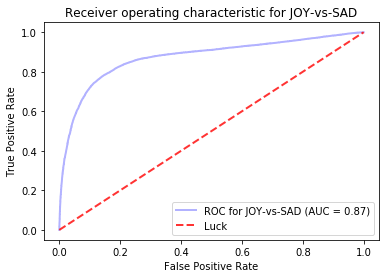

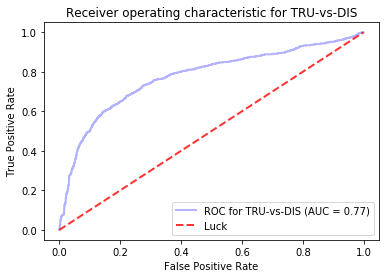

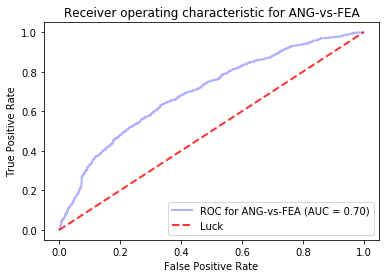

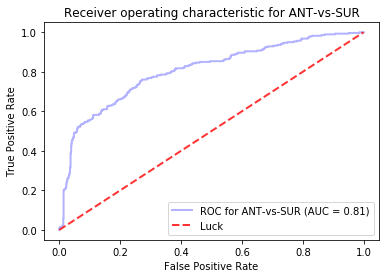

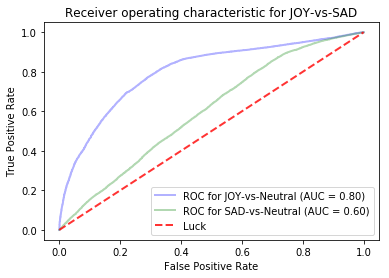

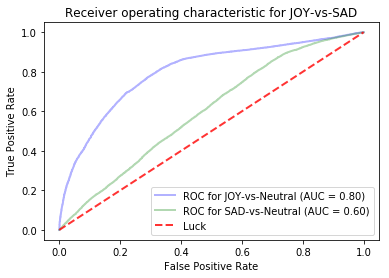

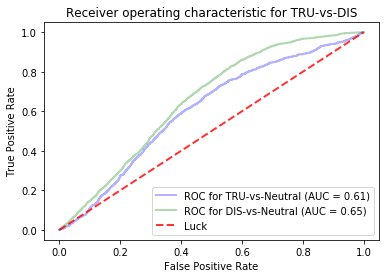

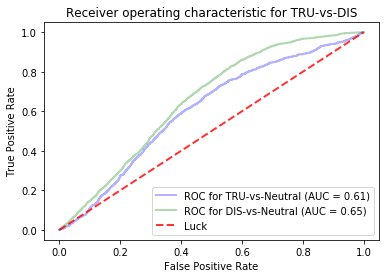

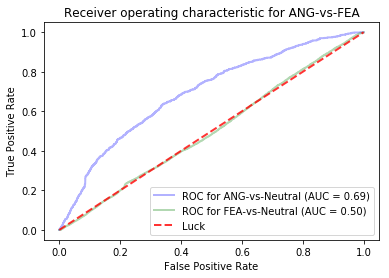

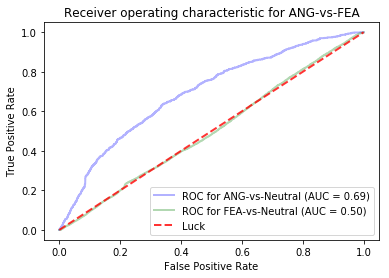

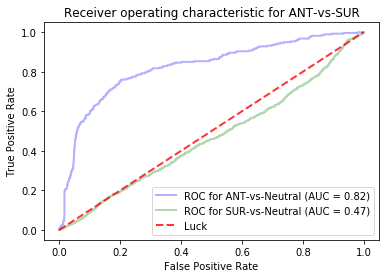

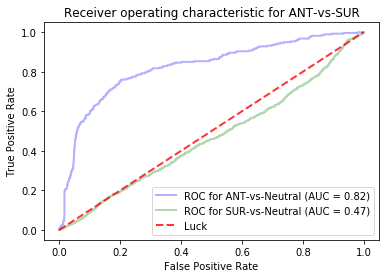

In [20]:
for emo_pair in emotions:
    print_roc_curve(results, emo_pair, "emo-vs-emo", "free-domain", "svm")    
    
for emo_pair in emotions:
    print_roc_curve(results, emo_pair, "emo-vs-emo-vs-neutral", "free-domain", "svm")    
    print_roc_curve(results, emo_pair, "emo-vs-emo-vs-neutral", "free-domain", "svm")    

<h2>Testing on Stock market related corpus</h2>

In [12]:
stock_dataframe_test = pd.read_csv(os.path.join(dataset_dir, 'tweets_stocks_emolex.csv'), engine='c')

tfidf = pickle.load(open(os.path.join(models_dir, 'tfidf_vectorizer.pkl'), "rb"), encoding='latin1')
tfs = tfidf.transform(stock_dataframe_test['text'])
    
svd_transformer = pickle.load(open(os.path.join(models_dir, 'svd_transformer.pkl'), "rb"), encoding='latin1')

stock_svd_test = svd_transformer.transform(tfs)
    
stock_svd_and_emolex_test = stock_svd_test
for dim in ["emolex_joy","emolex_sad","emolex_trust",\
            "emolex_disgust","emolex_anger","emolex_fear",\
            "emolex_anticipation","emolex_surprise",\
            "emolex_positive","emolex_negative"]:
    stock_svd_and_emolex_test = np.c_[stock_svd_and_emolex_test, stock_dataframe_test[dim]]
                
stock_svd_and_emolex_test = normalizer.transform(stock_svd_and_emolex_test)

print(stock_svd_and_emolex_test.shape)

/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfTransformer from version pre-0.18 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfVectorizer from version pre-0.18 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


(4517, 20)


/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TruncatedSVD from version pre-0.18 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [23]:
from multiprocessing import Pool

pool = Pool()

for clf_key in clf.keys():
            
        key_0 = list(clf[clf_key].keys())[2]
        key_1 = list(clf[clf_key].keys())[3]
    
        Y, X, indexes = extract_emos_attrs_n_class(stock_dataframe_test, stock_svd_and_emolex_test, key_1, key_0)
    
        print("Testing emotion vs emotion")
        benchmark_classifier(clf, clf_key, X, Y, key_0, key_1, "emo-vs-emo", "stock-domain", "svm")
    
        Y_neutral, X_neutral, indexes_neutral = extract_neutral_attrs_n_class_and_with_all_neutral(stock_dataframe_test, stock_svd_and_emolex_test, key_1, key_0)
    
        X = np.concatenate((X, X_neutral), axis=0)
        Y = np.concatenate((Y, np.array([2] * len(Y_neutral))), axis=0)
    
        print("Testing emotion vs emotion vs neutral")
        benchmark_classifier(clf, clf_key, X, Y, key_0, key_1, "emo-vs-emo-vs-neutral", "stock-domain", "svm")
        

Testing emotion vs emotion
              precision    recall  f1-score   support

         SAD       0.52      0.54      0.53       437
         JOY       0.57      0.19      0.28       531
     neutral       0.00      0.00      0.00         0

   micro avg       0.35      0.35      0.35       968
   macro avg       0.36      0.24      0.27       968
weighted avg       0.54      0.35      0.40       968

		Confusion Matrix: 
Predicted as:	SAD	JOY	neutral
SAD tweets:	238	77	122
JOY tweets:	224	101	206
neutral tweets:	0	0	0


Testing emotion vs emotion vs neutral
              precision    recall  f1-score   support

         SAD       0.20      0.54      0.29       437
         JOY       0.10      0.19      0.13       531
     neutral       0.70      0.32      0.44      2339

   micro avg       0.33      0.33      0.33      3307
   macro avg       0.33      0.35      0.29      3307
weighted avg       0.54      0.33      0.37      3307

		Confusion Matrix: 
Predicted as:	SAD	JOY	neutral


Testing on full agreement subset

In [25]:
stock_dataframe_test = pd.read_csv(os.path.join(dataset_dir, 'full_agreement/tweets_stocks_emolex.csv'), engine='c')

tfidf = pickle.load(open(os.path.join(models_dir, 'tfidf_vectorizer.pkl'), "rb"), encoding='latin1')
tfs = tfidf.transform(stock_dataframe_test['text'])
    
svd_transformer = pickle.load(open(os.path.join(models_dir, 'svd_transformer.pkl'), "rb"), encoding='latin1')

stock_svd_test = svd_transformer.transform(tfs)
    
stock_svd_and_emolex_test = stock_svd_test
for dim in ["emolex_joy","emolex_sad","emolex_trust",\
            "emolex_disgust","emolex_anger","emolex_fear",\
            "emolex_anticipation","emolex_surprise",\
            "emolex_positive","emolex_negative"]:
    stock_svd_and_emolex_test = np.c_[stock_svd_and_emolex_test, stock_dataframe_test[dim]]
                
stock_svd_and_emolex_test = normalizer.transform(stock_svd_and_emolex_test)

print(stock_svd_and_emolex_test.shape)

/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfTransformer from version pre-0.18 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfVectorizer from version pre-0.18 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TruncatedSVD from version pre-0.18 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


(334, 20)


In [26]:
pool = Pool()

for clf_key in clf.keys():
            
        key_0 = list(clf[clf_key].keys())[2]
        key_1 = list(clf[clf_key].keys())[3]
    
        for k in list(clf[clf_key].keys()):
            if k in ['JOY', 'SAD', 'TRU', 'DIS', 'ANG', 'FEA', 'ANT', 'SUR']:
                if key_0 is None:
                    key_0 = k
                elif key_1 is None:
                    key_1 = k
                
                if key_0 != None and key_1 != None:
                    break
                
        print("key_0 = %s, key_1 = %s" % (key_0, key_1))
    
        Y, X, indexes = extract_emos_attrs_n_class(stock_dataframe_test, stock_svd_and_emolex_test, key_0, key_1)
        
        print("Testing emotion vs emotion")
        benchmark_classifier(clf, clf_key, X, Y, key_0, key_1, "emo-vs-emo", "stock-domain-full-agreement", "svm")
        
        Y_neutral, X_neutral, indexes_neutral = extract_neutral_attrs_n_class(stock_dataframe_test, stock_svd_and_emolex_test, key_0, key_1)
    
        X = np.concatenate((X, X_neutral), axis=0)
        Y = np.concatenate((Y, np.array([2] * len(Y_neutral))), axis=0)
    
        print("Testing emotion vs emotion vs neutral")
        benchmark_classifier(clf, clf_key, X, Y, key_0, key_1, "emo-vs-emo-vs-neutral", "stock-domain-full-agreement", "svm")

key_0 = SAD, key_1 = JOY
Testing emotion vs emotion


/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/metrics/ranking.py:648: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/metrics/ranking.py:114: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):
/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

         SAD       0.64      0.45      0.53        31
         JOY       0.00      0.00      0.00        13
     neutral       0.00      0.00      0.00         0

   micro avg       0.32      0.32      0.32        44
   macro avg       0.21      0.15      0.18        44
weighted avg       0.45      0.32      0.37        44

		Confusion Matrix: 
Predicted as:	SAD	JOY	neutral
SAD tweets:	14	2	15
JOY tweets:	8	0	5
neutral tweets:	0	0	0


Testing emotion vs emotion vs neutral


/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         SAD       0.45      0.45      0.45        31
         JOY       0.00      0.00      0.00        13
     neutral       0.47      0.44      0.46        41

   micro avg       0.38      0.38      0.38        85
   macro avg       0.31      0.30      0.30        85
weighted avg       0.39      0.38      0.38        85

		Confusion Matrix: 
Predicted as:	SAD	JOY	neutral
SAD tweets:	14	2	15
JOY tweets:	8	0	5
neutral tweets:	9	14	18


key_0 = DIS, key_1 = TRU
Testing emotion vs emotion
              precision    recall  f1-score   support

         DIS       0.67      0.35      0.46        52
         TRU       0.12      0.20      0.15        15
     neutral       0.00      0.00      0.00         0

   micro avg       0.31      0.31      0.31        67
   macro avg       0.26      0.18      0.20        67
weighted avg       0.55      0.31      0.39        67

		Confusion Matrix: 
Predicted as:	DIS	TRU	neutral
DIS tweets:	18	21	13

<h3>Testing Deep Learning Models</h3>

In [27]:
import keras

clf_dl = pickle.load(open(os.path.join(models_dir, 'probs_train_deep_neutral.pkl'), 'rb'))

clf_dl['JOY-vs-SAD']['model-dl'] = keras.models.load_model(os.path.join(models_dir, 
                                                                             'classifier_dl_JOY_vs_SAD_emolex.h5'))
        
clf_dl['TRU-vs-DIS']['model-dl'] = keras.models.load_model(os.path.join(models_dir, 
                                                                             'classifier_dl_TRU_vs_DIS_emolex.h5'))
        
clf_dl['ANG-vs-FEA']['model-dl'] = keras.models.load_model(os.path.join(models_dir, 
                                                                             'classifier_dl_ANG_vs_FEA_emolex.h5'))
        
clf_dl['ANT-vs-SUR']['model-dl'] = keras.models.load_model(os.path.join(models_dir, 
                                                                             'classifier_dl_ANT_vs_SUR_emolex.h5'))


Using TensorFlow backend.
/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator SVC from version 0.18.1 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


/home/fernando/libs/anaconda/lib/python3.7/site-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [28]:
from nlp_utils.nlp_semantic import *

from nlp_utils.w2v import np_to_indexes

max_sentence_len = 400
vocabulary_inv = pickle.load(open(os.path.join(models_dir,'vocabulary_inv.pkl'), 'rb'))

x_test = np.array([[c for c in lex_tokenize(x)] for x in dataframe_test['text']])
x_test = np_to_indexes(x_test, vocabulary_inv, max_sentence_len)
print(x_test)

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress


[[     0 133112  12884 ...      0      0      0]
 [134294  49642 166186 ...      0      0      0]
 [206162   8325 109805 ...      0      0      0]
 ...
 [238562 250131  82852 ...      0      0      0]
 [109268  14623 238562 ...      0      0      0]
 [134294   8325 206064 ...      0      0      0]]


In [29]:
def benchmark_classifier_dl(clf_dl, clf_key, X, Y, key_0, key_1, exp_name, corpus_name, alg_name):
    pred_prob = clf_dl[clf_key]['model-dl'].predict(X) 
    Y_pred_ = [int(prob[0] > 0.5) for prob in pred_prob]
    Y_prob = [(1.0-prob[0], prob[0]) for prob in pred_prob]
    
    print(clf_key)
    print(clf_dl[clf_key].keys())    
    
    print("%s threshold = %.2f" % (key_0, clf_dl[clf_key][key_0]['threshold-dl']))
    print("%s threshold = %.2f" % (key_1, clf_dl[clf_key][key_1]['threshold-dl']))
    
    #for pred, prob, real in zip(Y_pred_, Y_prob, Y):
    #    print("%s prob = %.2f, %s prob = %.2f; real = %d (%s), class = %s" % (emo_pair[0], prob[0],
    #                                                         emo_pair[1], prob[1],
    #                                                         real,
    #                                                         emo_pair[0] if real == 0 else emo_pair[1],
    #                                                         emo_pair[0] if pred ==  0 and prob[0] >= clf_dl[emo_pair_key][emo_pair[0]]['threshold-dl'] else \
    #                                                         emo_pair[1] if pred == 1 and prob[1] >= clf_dl[emo_pair_key][emo_pair[1]]['threshold-dl'] else \
    #                                                          "neutral"))
    
    #Y_pred = [0 if pred == 0 and prob[0] >= clf_dl[emo_pair_key][emo_pair[0]]['threshold-dl'] else \
    #              1 if pred == 1 and prob[1] >= clf_dl[emo_pair_key][emo_pair[1]]['threshold-dl'] else \
    #              2 for pred, prob in zip(Y_pred_, Y_prob)]
    
    Y_pred = [2 if prob[0] < clf_dl[clf_key][key_0]['threshold-dl'] and \
              prob[1] < clf_dl[clf_key][key_1]['threshold-dl'] else \
              pred for pred, prob in zip(Y_pred_, Y_prob)]                
    
    f1 = f1_score(Y, Y_pred, average='macro')
    acc = accuracy_score(Y, Y_pred)
    
    if not exp_name in results.keys():
        results[exp_name] = {}
        
    if not corpus_name in results[exp_name].keys():
        results[exp_name][corpus_name] = {}
        
    if not alg_name in results[exp_name][corpus_name].keys():
        results[exp_name][corpus_name][alg_name] = {clf_key:{'f1':None, 'acc': None}}
        
    if not clf_key in results[exp_name][corpus_name][alg_name].keys():
        results[exp_name][corpus_name][alg_name][clf_key] = {'f1':None, 'acc': None}
        
    results[exp_name][corpus_name][alg_name][clf_key]['f1'] = f1
    results[exp_name][corpus_name][alg_name][clf_key]['acc'] = acc
    
    print(classification_report(Y, Y_pred, target_names=[emo_pair[1], emo_pair[0], 'neutral']))
    
    print("\t\tConfusion Matrix: ")
    conf_matrix = confusion_matrix(Y, Y_pred)
        
    print("Predicted as:\t%s\t%s\t%s" % (key_1, key_0, "neutral"))
    print("%s tweets:\t%d\t%d\t%d" % (key_1, conf_matrix[0][0], conf_matrix[0][1], conf_matrix[0][2]))
    print("%s tweets:\t%d\t%d\t%d" % (key_0, conf_matrix[1][0], conf_matrix[1][1], conf_matrix[1][2]))
    print("%s tweets:\t%d\t%d\t%d" % ("neutral", conf_matrix[2][0], conf_matrix[2][1], conf_matrix[2][2]))
        
    print('\n')

In [30]:
for emo_pair in emotions:
    emo_pair_key = '%s-vs-%s' % (emo_pair[1], emo_pair[0])

    Y, X, indexes = extract_emos_attrs_n_class(dataframe_test, 
                                                            x_test, 
                                                            emo_pair[1], emo_pair[0])
    
    benchmark_classifier_dl(clf_dl, emo_pair_key, X, Y, emo_pair[1], emo_pair[0], "emo-vs-emo", "free-domain", "cnn")
    
    Y_neutral, X_neutral, indexes_neutral = extract_neutral_attrs_n_class(dataframe_test, 
                                                                              x_test, 
                                                                          emo_pair[1], emo_pair[0])
    
    X = np.concatenate((X, X_neutral), axis=0)
    Y = np.concatenate((Y, np.array([2] * len(Y_neutral))), axis=0)

    benchmark_classifier_dl(clf_dl, emo_pair_key, X, Y, emo_pair[1], emo_pair[0], "emo-vs-emo-vs-neutral", "free-domain", "cnn")

JOY-vs-SAD
dict_keys(['model', 'model-dl', 'SAD', 'JOY', 'neutral_folds_ind', 'neutral-pred', 'max-f1', 'neutral-pred-dl', 'max-f1-dl'])
JOY threshold = 0.97
SAD threshold = 0.81


/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

         JOY       1.00      0.85      0.92     22167
         SAD       1.00      0.84      0.91     14373
     neutral       0.00      0.00      0.00         0

   micro avg       0.85      0.85      0.85     36540
   macro avg       0.67      0.56      0.61     36540
weighted avg       1.00      0.85      0.92     36540

		Confusion Matrix: 
Predicted as:	SAD	JOY	neutral
SAD tweets:	18875	28	3264
JOY tweets:	24	12008	2341
neutral tweets:	0	0	0


JOY-vs-SAD
dict_keys(['model', 'model-dl', 'SAD', 'JOY', 'neutral_folds_ind', 'neutral-pred', 'max-f1', 'neutral-pred-dl', 'max-f1-dl'])
JOY threshold = 0.97
SAD threshold = 0.81
              precision    recall  f1-score   support

         JOY       0.87      0.85      0.86     22167
         SAD       0.94      0.84      0.88     14373
     neutral       0.53      0.63      0.58     10052

   micro avg       0.80      0.80      0.80     46592
   macro avg       0.78      0.77      0.

In [31]:
print(vocabulary_inv)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Testing on stock market corpus

In [32]:
stock_dataframe_test = pd.read_csv(os.path.join(dataset_dir, 'tweets_stocks_emolex.csv'), engine='c')
stock_x_test = np.array([[c for c in lex_tokenize(x)] for x in stock_dataframe_test['text']])
stock_x_test = np_to_indexes(stock_x_test, vocabulary_inv, max_sentence_len)

In [22]:
for emo_pair in emotions:
    emo_pair_key = '%s-vs-%s' % (emo_pair[1], emo_pair[0])
    
    Y, X, indexes = extract_emos_attrs_n_class(stock_dataframe_test, stock_x_test, emo_pair[1], emo_pair[0])
        
    benchmark_classifier_dl(clf_dl, emo_pair_key, X, Y, emo_pair[0], emo_pair[1], "emo-vs-emo", "stock-domain", "cnn")
        
    Y_neutral, X_neutral, indexes_neutral = extract_neutral_attrs_n_class(stock_dataframe_test, 
                                                                          stock_x_test, 
                                                                          emo_pair[1], emo_pair[0])
    
    X = np.concatenate((X, X_neutral), axis=0)
    Y = np.concatenate((Y, np.array([2] * len(Y_neutral))), axis=0)  
    
    benchmark_classifier_dl(clf_dl, emo_pair_key, X, Y, emo_pair[0], emo_pair[1], "emo-vs-emo-vs-neutral", "stock-domain", "cnn")

NameError: name 'stock_x_test' is not defined

Testing on Full Agreement subcorpus

In [34]:
stock_dataframe_test = pd.read_csv(os.path.join(dataset_dir, 'full_agreement/tweets_stocks_emolex.csv'), engine='c')
stock_x_test = np.array([[c for c in lex_tokenize(x)] for x in stock_dataframe_test['text']])
stock_x_test = np_to_indexes(stock_x_test, vocabulary_inv, max_sentence_len)

In [35]:
for emo_pair in emotions:
    emo_pair_key = '%s-vs-%s' % (emo_pair[1], emo_pair[0])
    
    Y, X, indexes = extract_emos_attrs_n_class(stock_dataframe_test, stock_x_test, emo_pair[1], emo_pair[0])
        
    benchmark_classifier_dl(clf_dl, emo_pair_key, X, Y, emo_pair[1], emo_pair[0], "emo-vs-emo", "stock-domain-full-agreement", "cnn")
        
    Y_neutral, X_neutral, indexes_neutral = extract_neutral_attrs_n_class(stock_dataframe_test, 
                                                                          stock_x_test, 
                                                                          emo_pair[1], emo_pair[0])
    
    X = np.concatenate((X, X_neutral), axis=0)
    Y = np.concatenate((Y, np.array([2] * len(Y_neutral))), axis=0)  
    
    benchmark_classifier_dl(clf_dl, emo_pair_key, X, Y, emo_pair[1], emo_pair[0], "emo-vs-emo-vs-neutral", "stock-domain-full-agreement", "cnn")

JOY-vs-SAD
dict_keys(['model', 'model-dl', 'SAD', 'JOY', 'neutral_folds_ind', 'neutral-pred', 'max-f1', 'neutral-pred-dl', 'max-f1-dl'])
JOY threshold = 0.97
SAD threshold = 0.81
              precision    recall  f1-score   support

         JOY       0.17      0.08      0.11        13
         SAD       0.60      0.10      0.17        31
     neutral       0.00      0.00      0.00         0

   micro avg       0.09      0.09      0.09        44
   macro avg       0.26      0.06      0.09        44
weighted avg       0.47      0.09      0.15        44

		Confusion Matrix: 
Predicted as:	SAD	JOY	neutral
SAD tweets:	1	2	10
JOY tweets:	5	3	23
neutral tweets:	0	0	0


JOY-vs-SAD
dict_keys(['model', 'model-dl', 'SAD', 'JOY', 'neutral_folds_ind', 'neutral-pred', 'max-f1', 'neutral-pred-dl', 'max-f1-dl'])
JOY threshold = 0.97
SAD threshold = 0.81
              precision    recall  f1-score   support

         JOY       0.14      0.08      0.10        13
         SAD       0.21      0.10      

/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ANT-vs-SUR
dict_keys(['model', 'model-dl', 'SUR', 'ANT', 'neutral_folds_ind', 'neutral-pred', 'max-f1', 'neutral-pred-dl', 'max-f1-dl'])
ANT threshold = 0.76
SUR threshold = 0.91
              precision    recall  f1-score   support

         ANT       0.67      0.26      0.38        23
         SUR       0.00      0.00      0.00        39
     neutral       0.00      0.00      0.00         0

   micro avg       0.10      0.10      0.10        62
   macro avg       0.22      0.09      0.13        62
weighted avg       0.25      0.10      0.14        62

		Confusion Matrix: 
Predicted as:	SUR	ANT	neutral
SUR tweets:	6	0	17
ANT tweets:	3	0	36
neutral tweets:	0	0	0


ANT-vs-SUR
dict_keys(['model', 'model-dl', 'SUR', 'ANT', 'neutral_folds_ind', 'neutral-pred', 'max-f1', 'neutral-pred-dl', 'max-f1-dl'])
ANT threshold = 0.76
SUR threshold = 0.91
              precision    recall  f1-score   support

         ANT       0.50      0.26      0.34        23
         SUR       0.00      0.00      

<h2>Final Results</h2>

In [36]:
def print_exp_results(results, exp_name, score):
    from IPython.core.display import display, HTML
    
    results_html = "<table>\n"
    
    header1 = '<tr><th></th>\n'
    header2 = '<tr><td></td>\n'
    lines = {}
    for k in results[exp_name].keys():
        header1 += '<th colspan="%d">%s</th>\n' % (len(results[exp_name][k].keys()), k)
        for k2 in results[exp_name][k].keys():
            header2 += '<td>%s</td>\n' % k2
            
            for k3 in results[exp_name][k][k2].keys():
                if not k3 in lines.keys():
                    lines[k3] = '<td>%s</td>' % k3
                lines[k3] += '<td>%.3f</td>' % results[exp_name][k][k2][k3][score]
            
    results_html += header1 + "</tr>" + header2 + "</tr>"
    for k in lines.keys():
        results_html += "<tr>" + lines[k] + "</tr>\n"
        
    display(HTML(results_html))

In [37]:
print('Show accuracy')
print_exp_results(results, "emo-vs-emo", 'acc')
print_exp_results(results, "emo-vs-emo-vs-neutral", 'acc')

print('Show F1 Score')
print_exp_results(results, "emo-vs-emo", 'f1')
print_exp_results(results, "emo-vs-emo-vs-neutral", 'f1')

Show accuracy


Show F1 Score


In [25]:
with open('results_bench_svd_24.pkl', 'wb') as handle:
    pickle.dump(results, handle)
handle.close()